# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [4]:
professions = ["Бармен", "Фермер", "Агент влияния", "Химик", "Волонтёр"]
data = dict()
for i in range(len(professions)):
  ans = 0
  j = 0
  jobs = []
  while True:
    params_j = {
      'text': professions[i],
      'area': 1,
      'page': j,
      'per_page': 100
    }
    data_j = requests.get(URL, params_j).json()
    sleep(0.01)
    if len(data_j["items"]) == 0:
      break
    ans += len(data_j["items"])
    jobs += data_j["items"]
    j += 1
  data[professions[i]] = jobs
  print(professions[i] + " : ", ans)

Бармен :  819
Фермер :  44
Агент влияния :  25
Химик :  504
Волонтёр :  113


(1 балл) Посчитайте сколько всего найдено вакансий:

In [5]:
ans = 0
for profession in data:
	ans += len(data[profession])
print("Всего : ", ans)

Всего :  1505


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [6]:
class Company:
    def __init__(self, name, lat, lng):
      self.name = name
      self.lat = lat
      self.lng = lng


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [9]:
data_companies = []
for profession in data:
  data_j = data[profession]
  for company in data_j:
    name = company["name"]
    lat = None
    if company is not None and company["address"] is not None:
      lat = company["address"]["lat"]
    lng = None
    if company is not None and company["address"] is not None:
      lng = company["address"]["lng"]
    data_companies.append(Company(name, lat, lng))
  j += 1

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [10]:
cnt = 0
for company in data_companies:
	if company.lat is not None and company.lng is not None:
	 	cnt += 1

print(cnt)

1087


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [11]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 243MB/s]


Создадим DataFrame:

In [12]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [13]:
diamonds.head(n = 5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [14]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_price = diamonds["total_sales_price"].max()
for index, row in diamonds.iterrows():
  if row["total_sales_price"] == max_price:
    print(index, max_price)

min_price = diamonds["total_sales_price"].min()
for index, row in diamonds.iterrows():
  if row["total_sales_price"] == min_price:
    print(index, min_price)


219702 1449881
0 200
1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 200
19 200
20 200
21 200
22 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [11]:
diamonds.replace(to_replace=["unknown", None], value=np.nan, inplace=True)
diamonds.isna().sum().sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
list(diamonds.columns[diamonds.isna().any(axis=0)])

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [8]:
cols = diamonds.columns[diamonds.columns.str.startswith(("fancy_color_", "fluor_"))]
len(cols)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [12]:
diamonds[cols].notna().sum()

fluor_color                     15726
fluor_intensity                219575
fancy_color_dominant_color       9164
fancy_color_secondary_color      1062
fancy_color_overtone             2038
fancy_color_intensity            9162
dtype: int64

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(cols, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [15]:
cols1 = diamonds.columns[diamonds.columns.str.startswith("culet_")]
print(len(cols1))
print(diamonds[cols1].notna().sum())
diamonds.drop(cols1, axis=1, inplace=True)

2
culet_size         133963
culet_condition     15319
dtype: int64


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [16]:
diamonds["total_sales_price"].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [20]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,NaN,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,NaN,62.1,58.0,14.84,14.91,9.24,NaN,NaN,1121792
219696,219697,Oval,H,VS2,18.88,NaN,GIA,Excellent,Excellent,NaN,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,NaN,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,NaN,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [21]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,NaN,0.0,0.0,0.00,0.00,0.00,NaN,NaN,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,NaN,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,NaN,I1,0.89,NaN,GIA,Good,Good,NaN,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,NaN,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,NaN,GIA,Excellent,Excellent,NaN,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
# your code here

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [23]:
matrix = diamonds["total_sales_price"]
np.matrix(matrix).dot(np.matrix(matrix).T)

matrix([[158540672665477]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

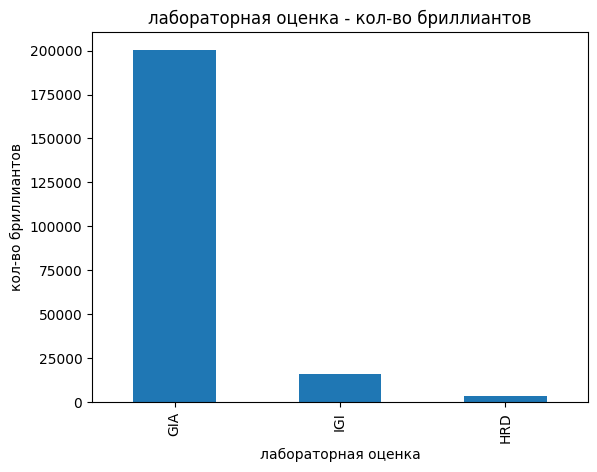

In [45]:
plot_df = diamonds["lab"].dropna().value_counts()
plot_df.plot(kind="bar")
plt.title("лабораторная оценка - кол-во бриллиантов")
plt.xlabel("лабораторная оценка")
plt.ylabel("кол-во бриллиантов")
plt.ticklabel_format(style='plain', axis="y")
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

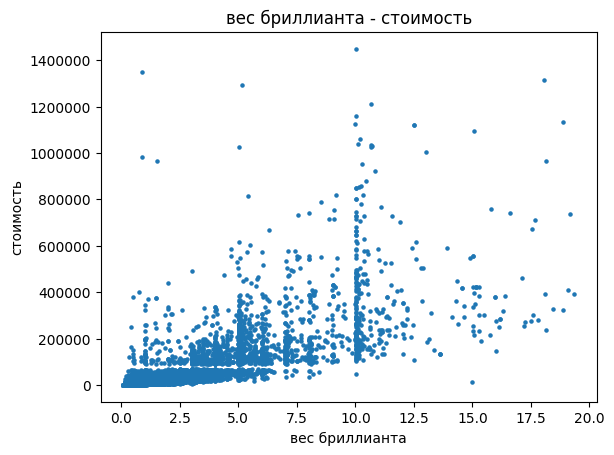

In [46]:
plot_df = diamonds[["carat_weight", "total_sales_price"]].dropna()
plot_df.plot(x="carat_weight", y="total_sales_price", kind="scatter", marker=".")
plt.title("вес бриллианта - стоимость")
plt.xlabel("вес бриллианта")
plt.ylabel("стоимость")
plt.ticklabel_format(style='plain', axis="y")
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

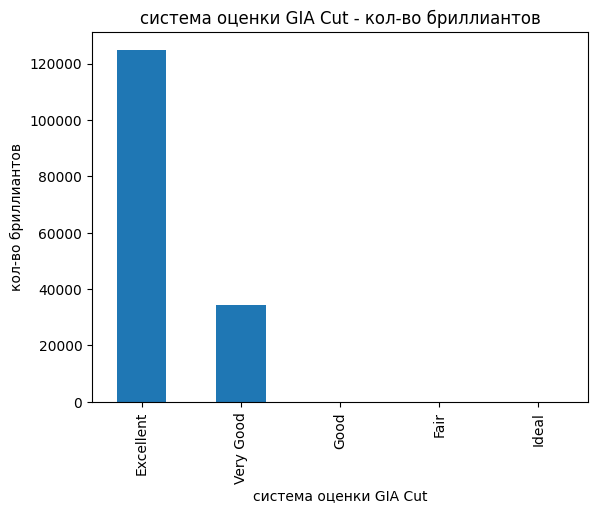

In [47]:
plot_df = diamonds["cut_quality"].dropna().value_counts()
plot_df.plot(kind="bar")
plt.title("система оценки GIA Cut - кол-во бриллиантов")
plt.xlabel("система оценки GIA Cut")
plt.ylabel("кол-во бриллиантов")
plt.ticklabel_format(style='plain', axis="y")
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [25]:
model = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
model.head(n = 10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [29]:
model = model.sample(frac = 1, random_state = 42).reset_index(drop=True)
model

,meas_length,meas_width,meas_depth,total_sales_price
0,4.76,4.77,2.95,1030
1,4.52,3.37,2.20,554
2,4.00,4.02,2.50,1152
3,4.31,4.32,2.75,610
4,5.73,5.78,3.52,3727
...,...,...,...,...
219698,4.70,4.73,2.91,1120
219699,5.45,5.49,3.25,3348
219700,4.27,4.30,2.64,664
219701,8.01,4.21,2.57,2372


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [30]:
model["Minkowski_sum"] = pd.DataFrame(data=[model["meas_length"].pow(3), model["meas_width"].pow(3), model["meas_depth"].pow(3)]).sum(axis=0).pow(1/3)
model

,meas_length,meas_width,meas_depth,total_sales_price,Minkowski_sum
0,4.76,4.77,2.95,1030,6.232142
1,4.52,3.37,2.20,554,5.208101
2,4.00,4.02,2.50,1152,5.248629
3,4.31,4.32,2.75,610,5.661664
4,5.73,5.78,3.52,3727,7.517572
...,...,...,...,...,...
219698,4.70,4.73,2.91,1120,6.164776
219699,5.45,5.49,3.25,3348,7.124808
219700,4.27,4.30,2.64,664,5.601543
219701,8.01,4.21,2.57,2372,8.460092


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [33]:
dataset = model[["Minkowski_sum", "total_sales_price"]]
dataset

,Minkowski_sum,total_sales_price
0,6.232142,1030
1,5.208101,554
2,5.248629,1152
3,5.661664,610
4,7.517572,3727
...,...,...
219698,6.164776,1120
219699,7.124808,3348
219700,5.601543,664
219701,8.460092,2372


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [36]:
idx = int(8 * len(dataset) / 10)
training = dataset.iloc[:idx].reset_index(drop=True)
testing = dataset.iloc[idx:].reset_index(drop=True)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

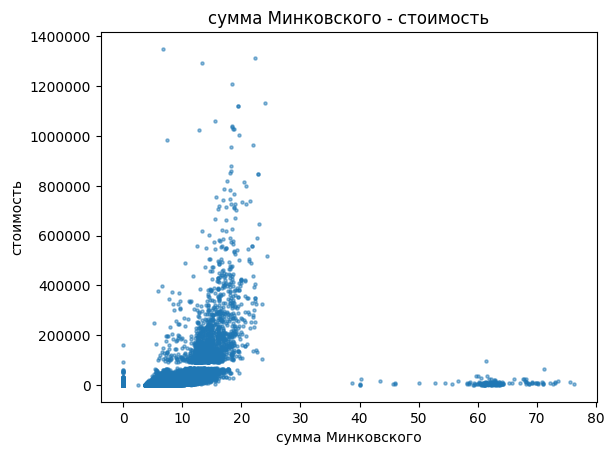

In [37]:
plot_df = training[["Minkowski_sum", "total_sales_price"]].dropna()
plot_df.plot(x = "Minkowski_sum", y = "total_sales_price", kind="scatter", marker=".", alpha=0.5)
plt.title("сумма Минковского - стоимость")
plt.xlabel("сумма Минковского")
plt.ylabel("стоимость")
plt.ticklabel_format(style='plain', axis="y")
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

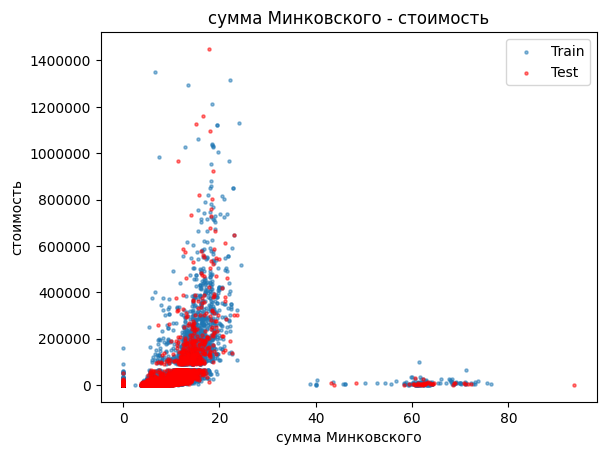

In [38]:
plot_df = training[["Minkowski_sum", "total_sales_price"]].dropna()
ax = plot_df.plot(x="Minkowski_sum", y = "total_sales_price", kind="scatter", marker=".", alpha=0.5)

plot_df = testing[["Minkowski_sum", "total_sales_price"]].dropna()
plot_df.plot(x = "Minkowski_sum", y = "total_sales_price", kind="scatter", marker=".", color="red", alpha=0.5, ax=ax)

plt.title("сумма Минковского - стоимость")
plt.xlabel("сумма Минковского")
plt.ylabel("стоимость")
plt.legend(["Train", "Test"])
plt.ticklabel_format(style='plain', axis="y")
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [39]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(training)
distances, indices = neighbours.kneighbors(testing)
predictions = training.iloc[indices.ravel()].reset_index(drop=True)
predictions

,Minkowski_sum,total_sales_price
0,6.534012,3880
1,5.728333,1342
2,8.778658,3808
3,7.591795,5271
4,8.856497,9654
...,...,...
43936,6.162136,1120
43937,7.060616,3348
43938,5.601652,664
43939,8.284955,2372


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [42]:
difference = 100 * (testing["total_sales_price"] - predictions["total_sales_price"]).abs() / (testing["total_sales_price"])
difference.max()

6.8889101933193135

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)